## Homework 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
pd.__version__

'0.23.0'

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df['marital.status'].unique()
# они похоже все такие. С отступами.

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

_Начало анализа датасета в воркшопе_

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [4]:
print("<=50K avg age: {}\n>50K avg age: {}".format(
    df[df['income'] == ' <=50K']['age'].mean(),
    df[df['income'] == ' >50K']['age'].mean()
))
print("<=50K std age: {}\n>50K std age: {}".format(
    df[df['income'] == ' <=50K']['age'].std(),
    df[df['income'] == ' >50K']['age'].std()
))

<=50K avg age: 36.78373786407767
>50K avg age: 44.24984058155847
<=50K std age: 14.020088490824813
>50K std age: 10.51902771985177


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

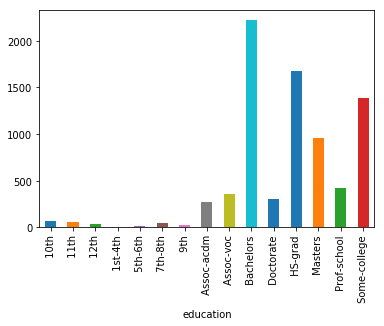

In [56]:
df1 = df[df['income'] == ' >50K']
df1.groupby('education')['income'].count().plot(kind='bar')

Да, правда.

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [6]:
male_df = df[df['sex'] == ' Male']
married = [' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse']
criterion1 = male_df['marital.status'].map(lambda x: x in married)
criterion2 = male_df['marital.status'].map(lambda x: x not in married)

print("% >50K married: {}\n% >50K idle: {}".format(
    round(male_df[criterion1 & (male_df['income'] == ' >50K')]['income'].count() * 100 / male_df.shape[0], 1),
    round(male_df[criterion2 & (male_df['income'] == ' >50K')]['income'].count() * 100 / male_df.shape[0], 1)
))

% >50K married: 27.4
% >50K idle: 3.2


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [7]:
for country in df['native.country'].unique():
    temp_df = df[df['native.country'] == country]
    print("Avg hours-per-week in{}:\nfor <=50K: {}\nfor >50K: {}\n".format(
    country,
    temp_df[temp_df['income'] == ' <=50K']['hours.per.week'].mean(),
    temp_df[temp_df['income'] == ' >50K']['hours.per.week'].mean()
))    

Avg hours-per-week in United-States:
for <=50K: 38.79912723305605
for >50K: 45.50536884674383

Avg hours-per-week in Cuba:
for <=50K: 37.98571428571429
for >50K: 42.44

Avg hours-per-week in Jamaica:
for <=50K: 38.23943661971831
for >50K: 41.1

Avg hours-per-week in India:
for <=50K: 38.233333333333334
for >50K: 46.475

Avg hours-per-week in ?:
for <=50K: 40.16475972540046
for >50K: 45.54794520547945

Avg hours-per-week in Mexico:
for <=50K: 40.00327868852459
for >50K: 46.57575757575758

Avg hours-per-week in South:
for <=50K: 40.15625
for >50K: 51.4375

Avg hours-per-week in Puerto-Rico:
for <=50K: 38.470588235294116
for >50K: 39.416666666666664

Avg hours-per-week in Honduras:
for <=50K: 34.333333333333336
for >50K: 60.0

Avg hours-per-week in England:
for <=50K: 40.483333333333334
for >50K: 44.53333333333333

Avg hours-per-week in Canada:
for <=50K: 37.91463414634146
for >50K: 45.64102564102564

Avg hours-per-week in Germany:
for <=50K: 39.13978494623656
for >50K: 44.97727272727273


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [44]:
import math

df2 = df.copy()
df2['passive.income'] = df['capital.gain'] - df['capital.loss']
df2['passive.income'] = (df2['passive.income'] - df2['passive.income'].mean()) / df2['passive.income'] .std()
df2['passive.income'] = df2['passive.income'].apply(lambda x: round(x))

pd.crosstab(df['education'], df2['passive.income'])

passive.income,-1,0,1,2,3,4,5,13
education,,,,,,,,
10th,1,922,5,1,1,1,0,2
11th,2,1152,17,4,0,0,0,0
12th,0,425,5,3,0,0,0,0
1st-4th,0,167,1,0,0,0,0,0
5th-6th,0,328,5,0,0,0,0,0
7th-8th,1,636,9,0,0,0,0,0
9th,0,511,2,0,0,0,0,1
Assoc-acdm,1,1015,35,13,2,0,0,1
Assoc-voc,0,1309,53,16,2,1,0,1


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [55]:
fem_df = df[df['sex'] == ' Female'] 
items = []

for country in fem_df['native.country'].unique():
    temp_df = fem_df[fem_df['native.country'] == country]
    items.append((country,
                round(temp_df[temp_df['income'] == ' >50K']['income'].count() * 100 / temp_df.shape[0], 1))) 

def takeSecond(x):
    return x[1]

items.sort(key=takeSecond, reverse=True)
for item in items:
    print("% >50K in{}: {}\n".format(item[0], item[1]))

% >50K in Yugoslavia: 33.3

% >50K in Taiwan: 26.7

% >50K in France: 25.0

% >50K in Japan: 25.0

% >50K in Iran: 25.0

% >50K in Italy: 23.8

% >50K in China: 23.8

% >50K in Canada: 23.1

% >50K in Greece: 20.0

% >50K in Scotland: 20.0

% >50K in England: 18.8

% >50K in India: 18.2

% >50K in Hong: 16.7

% >50K in Portugal: 16.7

% >50K in Hungary: 16.7

% >50K in Philippines: 16.4

% >50K in Honduras: 14.3

% >50K in Ireland: 14.3

% >50K in Laos: 12.5

% >50K in Germany: 11.7

% >50K in United-States: 11.1

% >50K in Poland: 10.5

% >50K in ?: 10.4

% >50K in South: 10.0

% >50K in Thailand: 9.1

% >50K in Nicaragua: 8.3

% >50K in Cuba: 7.5

% >50K in Dominican-Republic: 5.7

% >50K in Haiti: 5.0

% >50K in Vietnam: 4.3

% >50K in Puerto-Rico: 3.8

% >50K in El-Salvador: 2.9

% >50K in Jamaica: 2.3

% >50K in Mexico: 1.4

% >50K in Columbia: 0.0

% >50K in Guatemala: 0.0

% >50K in Peru: 0.0

% >50K in Outlying-US(Guam-USVI-etc): 0.0

% >50K in Trinadad&Tobago: 0.0

% >50K in E

Ответ: Югославия, Тайвань, Франция.

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [10]:
import random

df3 = df.copy()
salary = []
for x in df3['income']:
    if x == ' <=50K':
        salary.append(random.randint(0, 50))
    else:
        salary.append(random.randint(51, 200))
        
df3['magic_salary'] = salary
df3.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,magic_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,48
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,49
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,45
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,27


Т.е. magic_salary это долларов в час? Если так, то

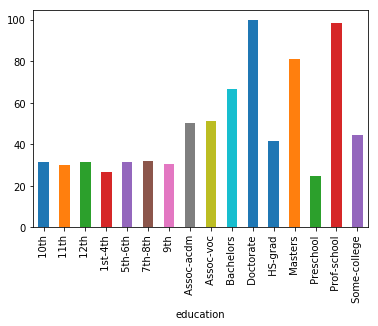

In [11]:
df3.groupby('education')['magic_salary'].mean().plot(kind='bar')  